In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib.pyplot import figure
from scipy.stats import linregress

constructor_path = "constructors.csv"
constructor_results_path = "constructor_results.csv"
pit_stops_path = "pit_stops.csv"
qualifying_path = "qualifying.csv"
races_path = "races.csv"
driver_standings_path = "driver_standings.csv"
status_path = "status.csv"
drivers_path = 'drivers.csv'

constructors = pd.read_csv(constructor_path)
constructor_results = pd.read_csv(constructor_results_path)
pit_stops = pd.read_csv(pit_stops_path)
qualifying = pd.read_csv(qualifying_path)
races = pd.read_csv(races_path)
driver_standings = pd.read_csv(driver_standings_path)
status = pd.read_csv(status_path)
drivers = pd.read_csv(drivers_path)

In [70]:
ds1421 = driver_standings[driver_standings['raceId'] >= 900]
ds1421 = pd.merge(ds1421, drivers, on='driverId').sort_values(by='driverId')
ds1421 = pd.merge(ds1421, races, on="raceId").groupby('year')
ds1421.head(100)

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,number,code,...,dob,nationality,url_x,year,round,circuitId,name,date,time,url_y
0,70531,1063,1,202.5,1,1,4,hamilton,44,HAM,...,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2021,12,13,Belgian Grand Prix,2021-08-29,13:00:00,http://en.wikipedia.org/wiki/2021_Belgian_Gran...
1,70549,1063,4,38.0,11,11,0,alonso,14,ALO,...,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,2021,12,13,Belgian Grand Prix,2021-08-29,13:00:00,http://en.wikipedia.org/wiki/2021_Belgian_Gran...
2,70541,1063,8,2.0,17,17,0,raikkonen,7,RAI,...,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...,2021,12,13,Belgian Grand Prix,2021-08-29,13:00:00,http://en.wikipedia.org/wiki/2021_Belgian_Gran...
3,70545,1063,20,35.0,12,12,0,vettel,5,VET,...,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,2021,12,13,Belgian Grand Prix,2021-08-29,13:00:00,http://en.wikipedia.org/wiki/2021_Belgian_Gran...
4,70535,1063,815,104.0,5,5,1,perez,11,PER,...,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,2021,12,13,Belgian Grand Prix,2021-08-29,13:00:00,http://en.wikipedia.org/wiki/2021_Belgian_Gran...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,68742,993,840,4.0,15,15,0,stroll,18,STR,...,1998-10-29,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll,2018,5,4,Spanish Grand Prix,2018-05-13,13:10:00,https://en.wikipedia.org/wiki/2018_Spanish_Gra...
2744,68746,993,842,12.0,12,12,0,gasly,10,GAS,...,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly,2018,5,4,Spanish Grand Prix,2018-05-13,13:10:00,https://en.wikipedia.org/wiki/2018_Spanish_Gra...
2745,68743,993,843,1.0,18,18,0,brendon_hartley,28,HAR,...,1989-11-10,New Zealander,http://en.wikipedia.org/wiki/Brendon_Hartley,2018,5,4,Spanish Grand Prix,2018-05-13,13:10:00,https://en.wikipedia.org/wiki/2018_Spanish_Gra...
2746,68741,993,844,9.0,13,13,0,leclerc,16,LEC,...,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc,2018,5,4,Spanish Grand Prix,2018-05-13,13:10:00,https://en.wikipedia.org/wiki/2018_Spanish_Gra...


In [71]:
ps_df = pd.merge(pit_stops, races, on='raceId')
# ps_df['driverRef'] = drivers['driverRef']
ps_df = ps_df[ps_df['date'] >= '2020-01-01']
ps_df = ps_df[ps_df['date'] <= '2020-12-31'].reset_index()
# ps_df = drivers['forename'] + ' ' + drivers['surname'] 

ps_df = pd.merge(ps_df, drivers, on='driverId').reset_index()
ps_df['driver'] = ps_df['forename'] + ' ' + ps_df['surname'] 
ps_df = ps_df.drop(['dob','nationality','url_y','driverRef','number','code','round','time_y','level_0', 'url_x', 'forename', 'surname','index','time_x', 'circuitId'], axis=1)
ps_df_g = ps_df.groupby(['driver', 'driverId']).sum()
ps_df_g = ps_df_g.drop(['raceId', 'lap', 'year'], axis=1)
ps_df_g['avg pitstop'] = ((ps_df_g['milliseconds'] / ps_df_g['stop'])/1000)
ps_df_g.sort_values(by='avg pitstop', ascending=False)
ps_df

,raceId,driverId,stop,lap,duration,milliseconds,year,name,date,driver
0,1031,154,1,20,23.280,23280,2020,Austrian Grand Prix,2020-07-05,Romain Grosjean
1,1032,154,1,37,22.444,22444,2020,Styrian Grand Prix,2020-07-12,Romain Grosjean
2,1033,154,1,34,22.591,22591,2020,Hungarian Grand Prix,2020-07-19,Romain Grosjean
3,1034,154,1,36,33.816,33816,2020,British Grand Prix,2020-08-02,Romain Grosjean
4,1035,154,1,17,29.377,29377,2020,70th Anniversary Grand Prix,2020-08-09,Romain Grosjean
...,...,...,...,...,...,...,...,...,...,...
589,1046,850,2,53,26.393,26393,2020,Sakhir Grand Prix,2020-12-06,Pietro Fittipaldi
590,1046,850,3,63,25.780,25780,2020,Sakhir Grand Prix,2020-12-06,Pietro Fittipaldi
591,1047,850,1,10,26.329,26329,2020,Abu Dhabi Grand Prix,2020-12-13,Pietro Fittipaldi
592,1047,850,2,34,28.501,28501,2020,Abu Dhabi Grand Prix,2020-12-13,Pietro Fittipaldi


In [72]:
colors2021 = ['#00D2BE','#0600EF','#DC0000', \
        '#FF8700','#0090FF','#2B4562','#006F62', \
        '#005AFF','#900000','#FFFFFF' ]
cr_2021 = constructor_results[constructor_results['raceId'] >= 1048].reset_index(drop=True)
cr_2021 = pd.merge(cr_2021, constructors, on="constructorId")
cr_2021 = cr_2021.drop(['constructorId', 'status', 'constructorRef', 'url', 'constructorResultsId', 'raceId'], axis=1)
cr_2021 = cr_2021.groupby(['name']).sum().sort_values(by='points',ascending=False)
cr_2021.index.rename('Constructor', inplace=True)
cr_2021 = cr_2021.reset_index(drop=False)
cr_2021 = cr_2021.rename(columns={'points':'2021 Points'})
cr_2021
# print(cr_2021.to_html(classes='table table-striped'))

,Constructor,2021 Points
0,Mercedes,613.5
1,Red Bull,585.5
2,Ferrari,323.5
3,McLaren,275.0
4,Alpine F1 Team,155.0
5,AlphaTauri,142.0
6,Aston Martin,77.0
7,Williams,23.0
8,Alfa Romeo,13.0
9,Haas F1 Team,0.0


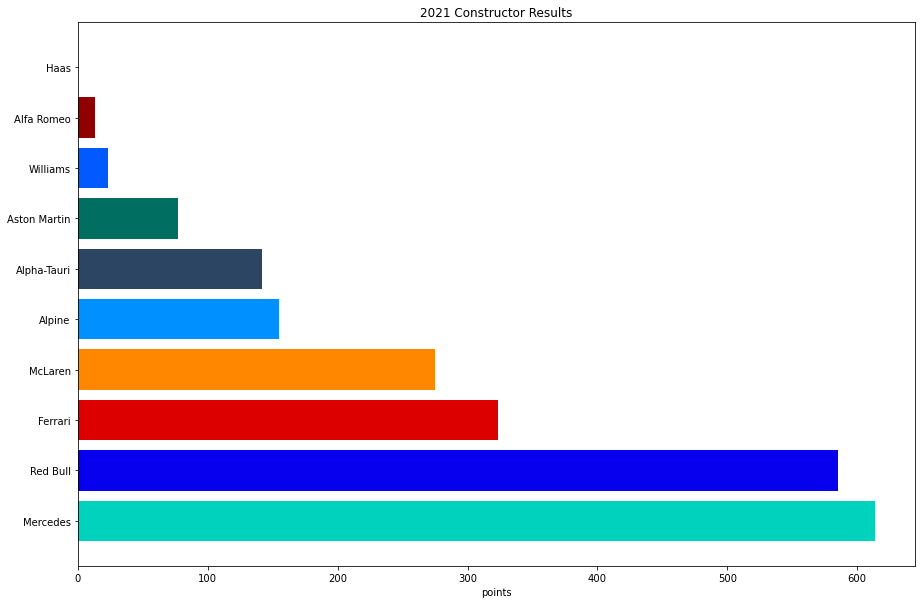

In [73]:
plt.figure(figsize=(15,10))
const21 = ['Mercedes', 'Red Bull','Ferrari','McLaren','Alpine','Alpha-Tauri','Aston Martin','Williams','Alfa Romeo','Haas']
points21 = [613.5,585.5,323.5,275,155,142,77,23,13,0]
plt.barh(const21,points21,color=colors2021)
plt.xlabel('points')
plt.title('2021 Constructor Results')
plt.savefig('../assets/images/2021_Constructor_Results.png', bbox_inches='tight')

In [74]:
colors2020 = ['#00D2BE','#0600EF','#F596C8', \
        '#FF8700','#FFF500','#C00000', \
        '#C8C8C8','#960000','#787878', '#0082FA']
cr_2020 = constructor_results[(constructor_results['raceId'] <= 1047) & (constructor_results['raceId'] >= 1031)].reset_index(drop=True)
cr_2020 = pd.merge(cr_2020, constructors, on="constructorId")
cr_2020 = cr_2020.drop(['constructorId', 'status', 'constructorRef', 'url', 'constructorResultsId', 'raceId'], axis=1)
cr_2020 = cr_2020.groupby(['name']).sum().sort_values(by='points',ascending=False)
cr_2020.index.rename('Constructor', inplace=True)
cr_2020 = cr_2020.reset_index(drop=False)
cr_2020 = cr_2020.rename(columns={'points':'2020 Points'})
cr_2020
# print(cr_2020.to_html(classes='table table-striped'))

,Constructor,2020 Points
0,Mercedes,573.0
1,Red Bull,319.0
2,Racing Point,210.0
3,McLaren,202.0
4,Renault,181.0
5,Ferrari,131.0
6,AlphaTauri,107.0
7,Alfa Romeo,8.0
8,Haas F1 Team,3.0
9,Williams,0.0


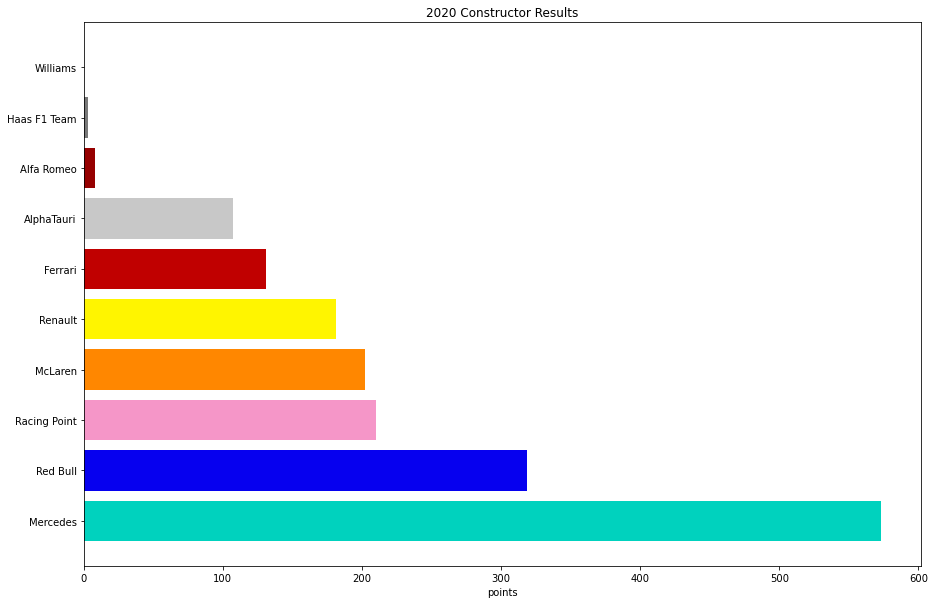

In [75]:
plt.figure(figsize=(15,10))
plt.barh(cr_2020['Constructor'],cr_2020['2020 Points'],color=colors2020)
plt.xlabel('points')
plt.title('2020 Constructor Results')
plt.savefig('../assets/images/2020_Constructor_Results.png', bbox_inches='tight')

In [76]:
colors2019 = ['#00D2BE','#DC0000','#1E41FF', \
        '#FF8700','#FFF500','#469BFF', \
        '#F596C8','#9B0000','#F0D787', '#F1F1FF']
cr_2019 = constructor_results[(constructor_results['raceId'] <= 1030) & (constructor_results['raceId'] >= 1010)].reset_index(drop=True)
cr_2019 = pd.merge(cr_2019, constructors, on="constructorId")
cr_2019 = cr_2019.drop(['constructorId', 'status', 'constructorRef', 'url', 'constructorResultsId', 'raceId'], axis=1)
cr_2019 = cr_2019.groupby(['name']).sum().sort_values(by='points',ascending=False)
cr_2019.index.rename('Constructor', inplace=True)
cr_2019 = cr_2019.reset_index()
cr_2019 = cr_2019.rename(columns={'points':'2019 Points'})
cr_2019
# print(cr_2019.to_html(classes='table table-striped'))

,Constructor,2019 Points
0,Mercedes,739.0
1,Ferrari,504.0
2,Red Bull,417.0
3,McLaren,145.0
4,Renault,91.0
5,Toro Rosso,85.0
6,Racing Point,73.0
7,Alfa Romeo,57.0
8,Haas F1 Team,28.0
9,Williams,1.0


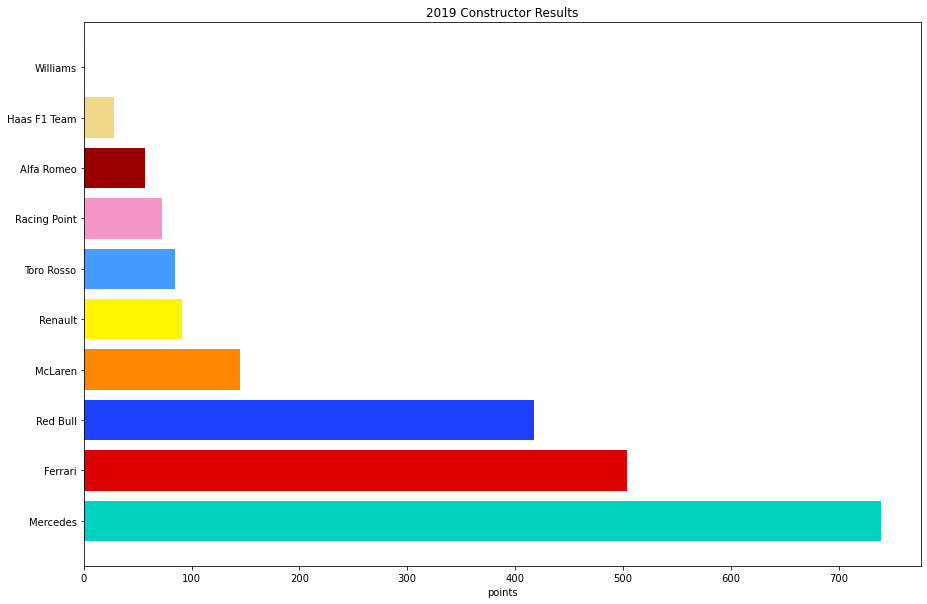

In [77]:
plt.figure(figsize=(15,10))
plt.barh(cr_2019['Constructor'],cr_2019['2019 Points'],color=colors2019)
plt.xlabel('points')
plt.title('2019 Constructor Results')
plt.savefig('../assets/images/2019_Constructor_Results.png', bbox_inches='tight')

In [78]:
colors2018 = ['#00D2BE','#DC0000','#00327D', \
        '#FFF500','#F596C8','#5A5A5A', \
        '#FF8700','#FF8700','#0032FF', '#F1F1FF']
cr_2018 = constructor_results[(constructor_results['raceId'] <= 1009) & (constructor_results['raceId'] >= 989)].reset_index(drop=True)
cr_2018 = pd.merge(cr_2018, constructors, on="constructorId")
cr_2018 = cr_2018.drop(['constructorId', 'status', 'constructorRef', 'url', 'constructorResultsId', 'raceId'], axis=1)
cr_2018 = cr_2018.groupby(['name']).sum().sort_values(by='points',ascending=False)
cr_2018.index.rename('Constructor', inplace=True)
cr_2018 = cr_2018.reset_index(drop=False)
cr_2018 = cr_2018.rename(columns={'points':'2018 Points'})
cr_2018
print(cr_2018.to_html(classes='table table-striped'))

<table border="1" class="dataframe table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Constructor</th>
      <th>2018 Points</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Mercedes</td>
      <td>655.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Ferrari</td>
      <td>571.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Red Bull</td>
      <td>419.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Renault</td>
      <td>122.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Force India</td>
      <td>111.0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Haas F1 Team</td>
      <td>93.0</td>
    </tr>
    <tr>
      <th>6</th>
      <td>McLaren</td>
      <td>62.0</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Sauber</td>
      <td>48.0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Toro Rosso</td>
      <td>33.0</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Williams</td>
      <td>7.0</td

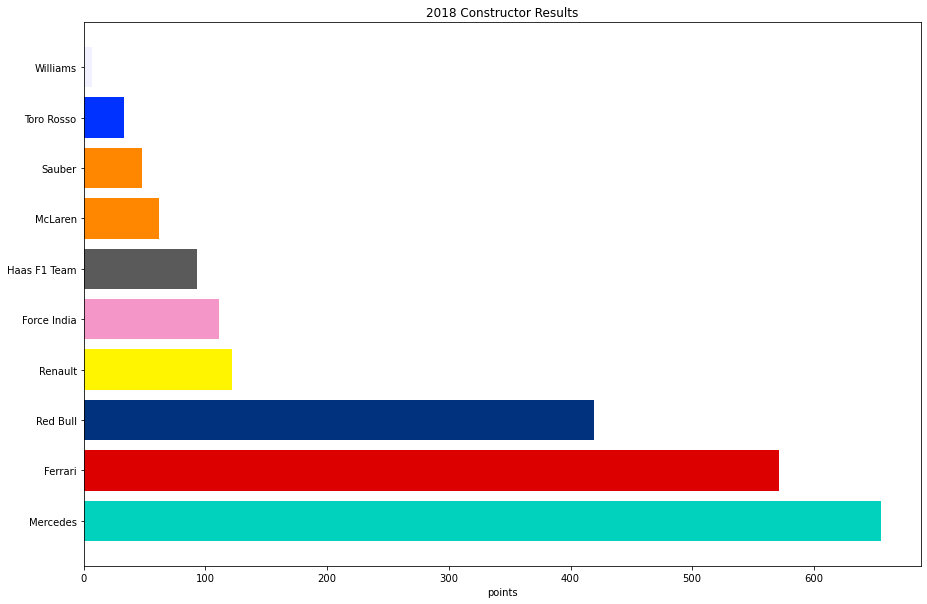

In [79]:
plt.figure(figsize=(15,10))
plt.barh(cr_2018['Constructor'],cr_2018['2018 Points'],color=colors2018)
plt.xlabel('points')
plt.title('2018 Constructor Results')
plt.savefig('../assets/images/2018_Constructor_Results.png', bbox_inches='tight')

In [80]:
colors2017 = ['#00CFBA','#C30000','#00007D', \
        '#FF80C7','#F1F1FF','#FFD800', \
        '#0000FF','#6C0000','#FF7B08', '#006EFF']
cr_2017 = constructor_results[(constructor_results['raceId'] <= 988) & (constructor_results['raceId'] >= 969)].reset_index(drop=True)
cr_2017 = pd.merge(cr_2017, constructors, on="constructorId")
cr_2017 = cr_2017.drop(['constructorId', 'status', 'constructorRef', 'url', 'constructorResultsId', 'raceId'], axis=1)
cr_2017 = cr_2017.groupby(['name']).sum().sort_values(by='points',ascending=False)
cr_2017.index.rename('Constructor', inplace=True)
cr_2017 = cr_2017.reset_index(drop=False)
cr_2017 = cr_2017.rename(columns={'points':'2017 Points'})
cr_2017
print(cr_2017.to_html(classes='table table-striped'))

<table border="1" class="dataframe table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Constructor</th>
      <th>2017 Points</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Mercedes</td>
      <td>668.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Ferrari</td>
      <td>522.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Red Bull</td>
      <td>368.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Force India</td>
      <td>187.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Williams</td>
      <td>83.0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Renault</td>
      <td>57.0</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Toro Rosso</td>
      <td>53.0</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Haas F1 Team</td>
      <td>47.0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>McLaren</td>
      <td>30.0</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Sauber</td>
      <td>5.0</td>

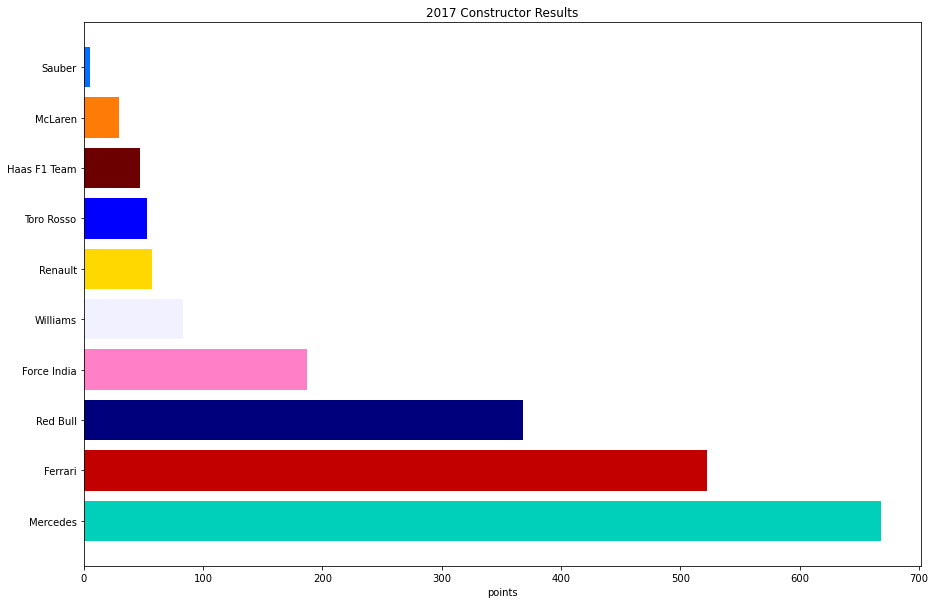

In [81]:
plt.figure(figsize=(15,10))
plt.barh(cr_2017['Constructor'],cr_2017['2017 Points'],color=colors2017)
plt.xlabel('points')
plt.title('2017 Constructor Results')
plt.savefig('../assets/images/2017_Constructor_Results.png', bbox_inches='tight')

In [82]:
colors2016 = ['#2AB4A5','#00007D','#C30000', \
        '#FF5F0F','#F1F1FF','#808080', \
        '#0000FF','#6C0000','#FFD800', '#006EFF', '#323232']
cr_2016 = constructor_results[(constructor_results['raceId'] <= 968) & (constructor_results['raceId'] >= 948)].reset_index(drop=True)
cr_2016 = pd.merge(cr_2016, constructors, on="constructorId")
cr_2016 = cr_2016.drop(['constructorId', 'status', 'constructorRef', 'url', 'constructorResultsId', 'raceId'], axis=1)
cr_2016 = cr_2016.groupby(['name']).sum().sort_values(by='points',ascending=False)
cr_2016.index.rename('Constructor', inplace=True)
cr_2016 = cr_2016.reset_index(drop=False)
cr_2016 = cr_2016.rename(columns={'points':'2016 Points'})
cr_2016
print(cr_2016.to_html(classes='table table-striped'))

<table border="1" class="dataframe table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Constructor</th>
      <th>2016 Points</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Mercedes</td>
      <td>765.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Red Bull</td>
      <td>468.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Ferrari</td>
      <td>398.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Force India</td>
      <td>173.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Williams</td>
      <td>138.0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>McLaren</td>
      <td>76.0</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Toro Rosso</td>
      <td>63.0</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Haas F1 Team</td>
      <td>29.0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Renault</td>
      <td>8.0</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Sauber</td>
      <td>2.0</td>

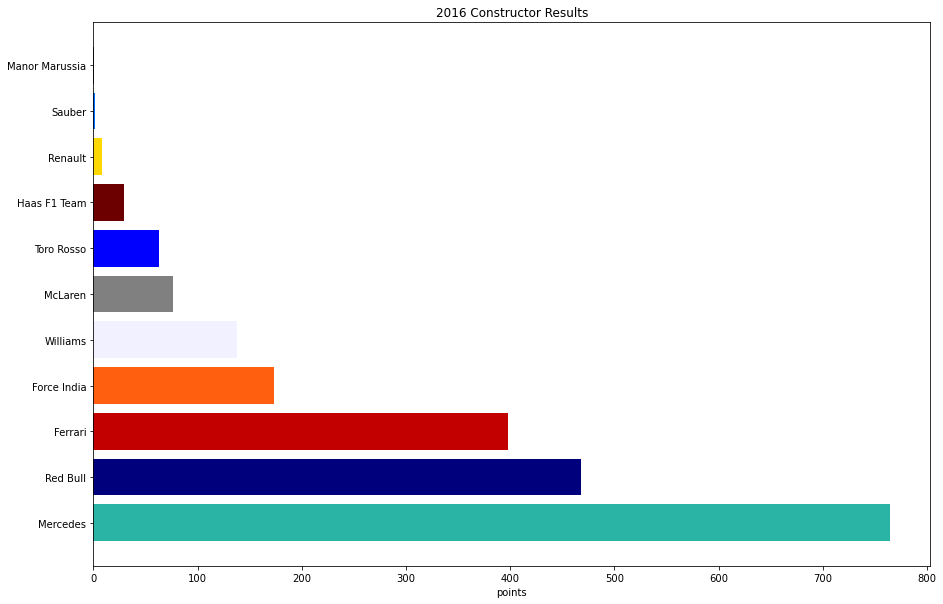

In [83]:
plt.figure(figsize=(15,10))
plt.barh(cr_2016['Constructor'],cr_2016['2016 Points'],color=colors2016)
plt.xlabel('points')
plt.title('2016 Constructor Results')
plt.savefig('../assets/images/2016_Constructor_Results.png', bbox_inches='tight')

In [84]:
colors2015 = ['#2AB4A5','#C30000','#F1F1FF', \
        '#00007D','#FF5F0F','#6C0000', \
        '#0000FF','#808080','#006EFF', '#323232', '#323232']
cr_2015 = constructor_results[(constructor_results['raceId'] <= 945) & (constructor_results['raceId'] >= 931)].reset_index(drop=True)
cr_2015 = pd.merge(cr_2015, constructors, on="constructorId")
cr_2015 = cr_2015.drop(['constructorId', 'status', 'constructorRef', 'url', 'constructorResultsId', 'raceId'], axis=1)
cr_2015 = cr_2015.groupby(['name']).sum().sort_values(by='points',ascending=False)
cr_2015.index.rename('Constructor', inplace=True)
cr_2015 = cr_2015.reset_index(drop=False)
cr_2015 = cr_2015.rename(columns={'points':'2015 Points'})
cr_2015
print(cr_2015.to_html(classes='table table-striped'))

<table border="1" class="dataframe table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Constructor</th>
      <th>2015 Points</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Mercedes</td>
      <td>501.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Ferrari</td>
      <td>296.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Williams</td>
      <td>176.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Red Bull</td>
      <td>157.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Force India</td>
      <td>125.0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Lotus F1</td>
      <td>62.0</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Toro Rosso</td>
      <td>53.0</td>
    </tr>
    <tr>
      <th>7</th>
      <td>McLaren</td>
      <td>27.0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Sauber</td>
      <td>17.0</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Manor Marussia</td>
      <td>0.0<

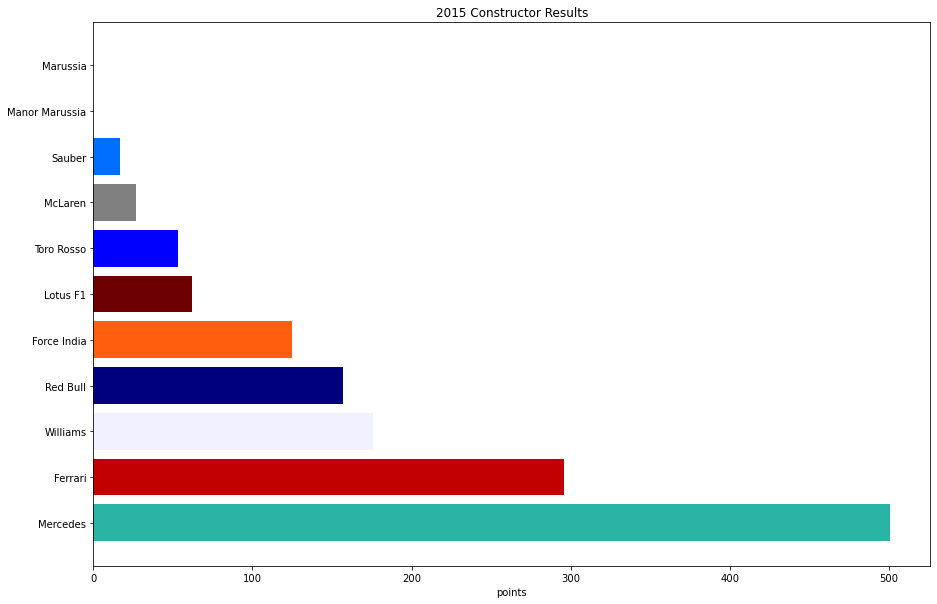

In [85]:
plt.figure(figsize=(15,10))
plt.barh(cr_2015['Constructor'],cr_2015['2015 Points'],color=colors2015)
plt.xlabel('points')
plt.title('2015 Constructor Results')
plt.savefig('../assets/images/2015_Constructor_Results.png', bbox_inches='tight')

In [86]:
colors2014 = ['#2AB4A5','#00007D','#F1F1FF', \
        '#C30000','#808080','#FF5F0F', \
        '#0000FF','#6C0000','#323232', '#004f30', '#006EFF']
cr_2014 = constructor_results[(constructor_results['raceId'] <= 918) & (constructor_results['raceId'] >= 900)].reset_index(drop=True)
cr_2014 = pd.merge(cr_2014, constructors, on="constructorId")
cr_2014 = cr_2014.drop(['constructorId', 'status', 'constructorRef', 'url', 'constructorResultsId', 'raceId'], axis=1)
cr_2014 = cr_2014.groupby(['name']).sum().sort_values(by='points',ascending=False)
cr_2014.index.rename('Constructor', inplace=True)
cr_2014 = cr_2014.reset_index(drop=False)
cr_2014 = cr_2014.rename(columns={'points':'2014 Points'})
cr_2014
# print(cr_2014.to_html(classes='table table-striped'))

,Constructor,2014 Points
0,Mercedes,701.0
1,Red Bull,405.0
2,Williams,320.0
3,Ferrari,216.0
4,McLaren,181.0
5,Force India,155.0
6,Toro Rosso,30.0
7,Lotus F1,10.0
8,Marussia,2.0
9,Caterham,0.0


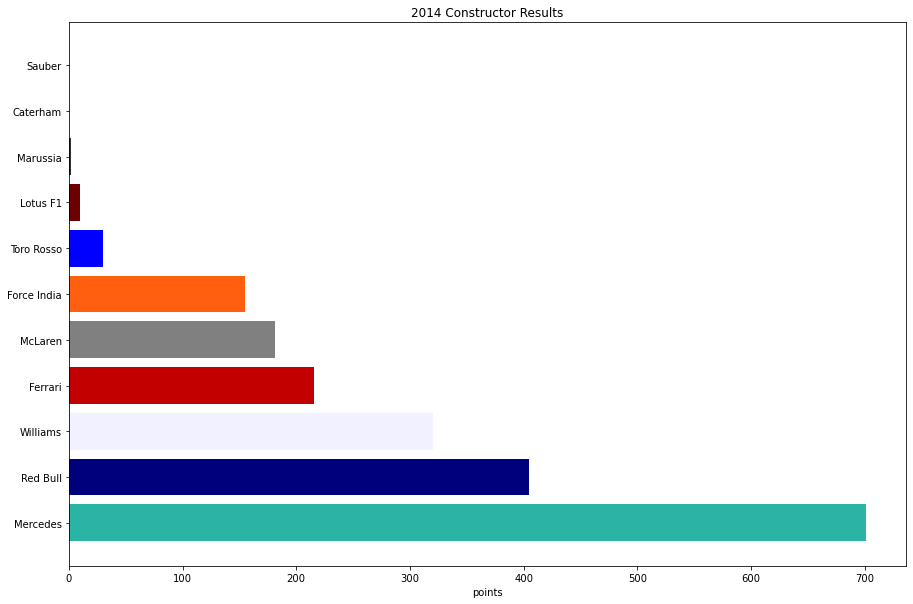

In [87]:
plt.figure(figsize=(15,10))
plt.barh(cr_2014['Constructor'],cr_2014['2014 Points'],color=colors2014)
plt.xlabel('points')
plt.title('2014 Constructor Results')
plt.savefig('../assets/images/2014_Constructor_Results.png', bbox_inches='tight')

In [88]:

dfs = [cr_2014, cr_2015, cr_2016, cr_2017, cr_2018, cr_2019, cr_2020, cr_2021]
df_merged = pd.concat(dfs,axis=1, ignore_index=False).fillna('N/A')
# df_merged = df_merged.transpose()
df_merged
printdf = df_merged.to_html(classes='table table-striped')
print(printdf)

<table border="1" class="dataframe table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Constructor</th>
      <th>2014 Points</th>
      <th>Constructor</th>
      <th>2015 Points</th>
      <th>Constructor</th>
      <th>2016 Points</th>
      <th>Constructor</th>
      <th>2017 Points</th>
      <th>Constructor</th>
      <th>2018 Points</th>
      <th>Constructor</th>
      <th>2019 Points</th>
      <th>Constructor</th>
      <th>2020 Points</th>
      <th>Constructor</th>
      <th>2021 Points</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Mercedes</td>
      <td>701.0</td>
      <td>Mercedes</td>
      <td>501.0</td>
      <td>Mercedes</td>
      <td>765.0</td>
      <td>Mercedes</td>
      <td>668</td>
      <td>Mercedes</td>
      <td>655</td>
      <td>Mercedes</td>
      <td>739</td>
      <td>Mercedes</td>
      <td>573</td>
      <td>Mercedes</td>
      <td>613.5</td>
    </tr>
    <tr>
      <th>1</th>
    

In [89]:
cr_20 = constructor_results[(constructor_results['raceId'] <= 1099) & (constructor_results['raceId'] >= 900)].reset_index(drop=True)
cr_20 = pd.merge(cr_20, constructors, on="constructorId")
cr_20 = cr_20.drop(['constructorId', 'status', 'constructorRef', 'url', 'constructorResultsId', 'raceId'], axis=1)
cr_20 = cr_20.groupby(['name']).sum().sort_values(by='points',ascending=False)
cr_20.index.rename('Constructor', inplace=True)
cr_20 = cr_20.reset_index(drop=False)
cr_20
# print(cr_20.to_html(classes='table table-striped'))

,Constructor,points
0,Mercedes,5417.5
1,Red Bull,3168.5
2,Ferrari,3093.5
3,McLaren,998.0
4,Williams,829.0
5,Force India,762.0
6,Renault,459.0
7,Toro Rosso,331.0
8,Racing Point,283.0
9,AlphaTauri,249.0


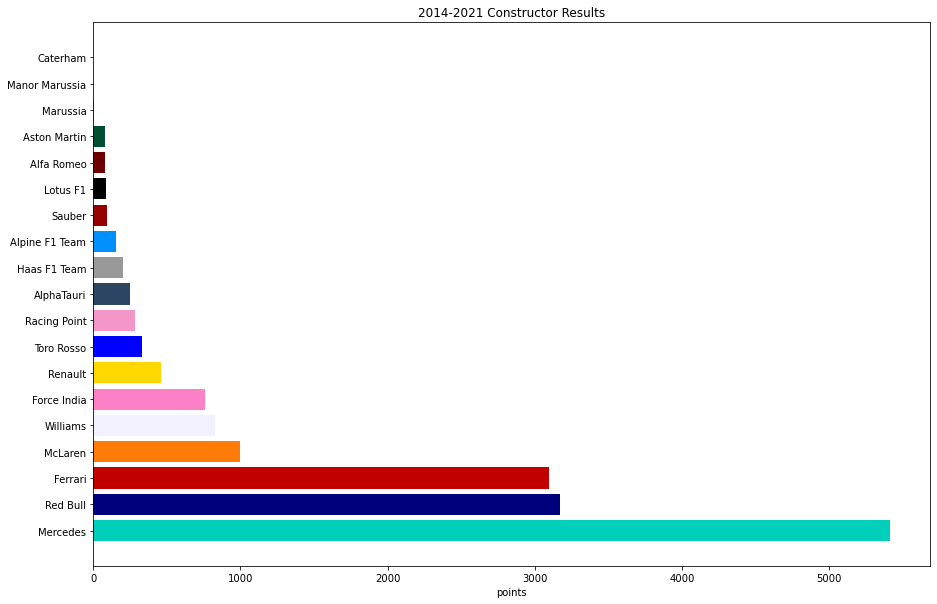

In [90]:
colorstot = ['#00CFBA','#00007D','#C30000', \
        '#FF7B08','#F1F1FF','#FF80C7', \
        '#FFD800','#0000FF', '#F596C8', '#2B4562', '#999999', '#0090FF', '#960000', '#000000','#6E0000', '#004f30' ]
plt.figure(figsize=(15,10))
plt.barh(cr_20['Constructor'],cr_20['points'],color=colorstot)
plt.xlabel('points')
plt.title('2014-2021 Constructor Results')
plt.savefig('../assets/images/2014_2021_Constructor_Results.png', bbox_inches='tight')